In [1]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench.util import ema_logging, utilities

plt.style.use('ggplot')
from matplotlib.pyplot import figure
import math

C:\Users\marce\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
results = utilities.load_results('results/CaseStudy200scenarios.csv')
experiments, outcomes = results

outcomes_splitted = {'evac100': [], 'evac95': [], 'evac75': [], 'evac50': [], 'mean_delay': [], 'min_delay': [], 'max_delay': [], 'mean_density': [], 'mean_walkspeed': [], 'exit1': [], 'exit2': [], 'exit3': [], 'exit4': [], 'exit5': []}

for outcome in outcomes["evactimes"]:
    outcomes_splitted['evac100'].append(outcome[0][0])
    outcomes_splitted['evac95'].append(outcome[0][1])
    outcomes_splitted['evac75'].append(outcome[0][2])
    outcomes_splitted['evac50'].append(outcome[0][3])
    
for outcome in outcomes["densities"]:
    outcomes_splitted['mean_delay'].append(outcome[0][0])
    outcomes_splitted['min_delay'].append(outcome[0][1])
    outcomes_splitted['max_delay'].append(outcome[0][2])
    outcomes_splitted['mean_density'].append(outcome[0][3])
    outcomes_splitted['mean_walkspeed'].append(outcome[0][4])
    
for outcome in outcomes["evacuees_per_exit"]:
    outcomes_splitted['exit1'].append(outcome[0][0])
    outcomes_splitted['exit2'].append(outcome[0][1])
    outcomes_splitted['exit3'].append(outcome[0][2])
    outcomes_splitted['exit4'].append(outcome[0][3])
    outcomes_splitted['exit5'].append(outcome[0][4])
    
df_outcomes = pd.DataFrame(outcomes_splitted)
df = pd.concat([experiments,df_outcomes],axis=1,sort=False)

# Using DataFrame.drop
df.drop(df.columns[3:10], axis=1, inplace=True)

In [19]:
df

,compliance,familiarity,population,scenario,policy,model,evac100,evac95,evac75,evac50,mean_delay,min_delay,max_delay,mean_density,mean_walkspeed,exit1,exit2,exit3,exit4,exit5
0,0.65,0.207972,1659.0,0,Base,evacuation,452.0,372.0,231.0,133.0,23.334138,2.0,262.0,0.289766,0.318368,35.0,67.0,72.0,1439.0,46.0
1,0.40,0.099203,1393.0,1,Base,evacuation,438.0,366.0,228.0,139.0,21.474820,2.0,205.0,0.226039,0.327172,12.0,26.0,27.0,1314.0,14.0
2,0.40,0.180339,1655.0,2,Base,evacuation,445.0,376.0,238.0,140.0,21.292226,2.0,200.0,0.263060,0.302286,29.0,64.0,60.0,1472.0,30.0
3,0.40,0.194878,1658.0,3,Base,evacuation,442.0,368.0,228.0,140.0,21.084211,2.0,239.0,0.261102,0.317343,25.0,66.0,69.0,1464.0,34.0
4,0.65,0.070770,1561.0,4,Base,evacuation,453.0,382.0,241.0,153.0,20.048422,2.0,179.0,0.226377,0.309218,10.0,27.0,29.0,1476.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.90,0.074767,1696.0,195,Staff,evacuation,372.0,304.0,221.0,144.0,19.795482,2.0,172.0,0.305198,0.328230,9.0,149.0,72.0,1326.0,140.0
1196,0.65,0.235253,1691.0,196,Staff,evacuation,385.0,336.0,206.0,117.0,18.559208,2.0,133.0,0.283833,0.350061,77.0,160.0,208.0,1190.0,56.0
1197,0.90,0.115028,1639.0,197,Staff,evacuation,347.0,279.0,194.0,124.0,19.897342,2.0,146.0,0.326421,0.380758,44.0,130.0,245.0,1083.0,137.0
1198,0.65,0.166098,1378.0,198,Staff,evacuation,367.0,300.0,173.0,111.0,18.929051,2.0,183.0,0.248251,0.401616,37.0,168.0,104.0,1020.0,49.0


In [20]:
table = pd.DataFrame()

table = table.append(df.groupby(['policy']).mean()["evac100"])
table = table.append(df.groupby(['policy']).min()["evac100"])
table = table.append(df.groupby(['policy']).max()["evac100"])
table = table.append(df.groupby(['policy']).std()["evac100"])

table = table.round(0).astype('int32').T
table.columns = ["Mean", "Min", "Max", "STD"]

In [21]:
table

,Mean,Min,Max,STD
Base,434,373,509,28
Dynamic Signs,340,243,432,40
Obstacles,404,329,479,32
Phased,438,371,514,30
Staff,362,281,457,35
Wider Both,394,321,474,30


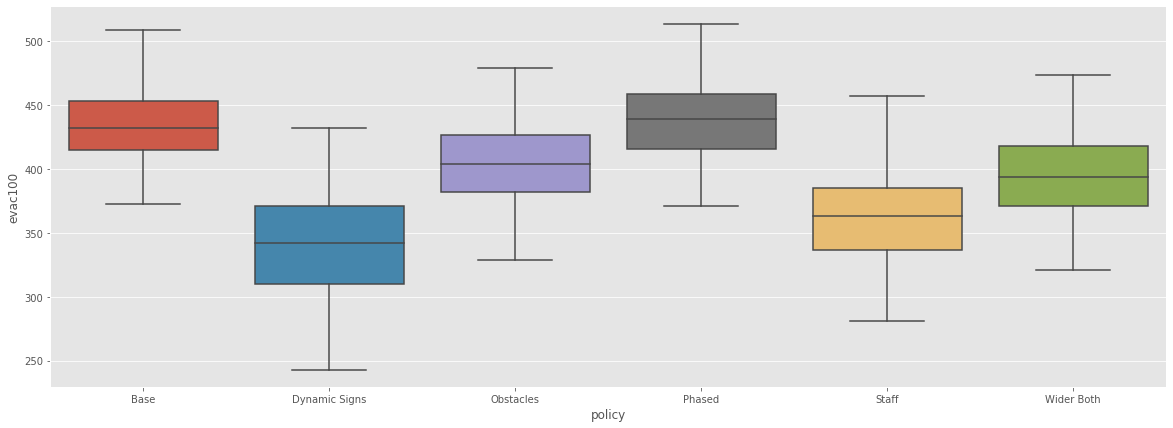

In [22]:
fig = plt.figure(figsize=(20,7))
sns.boxplot(x="policy", y="evac100", data=df)

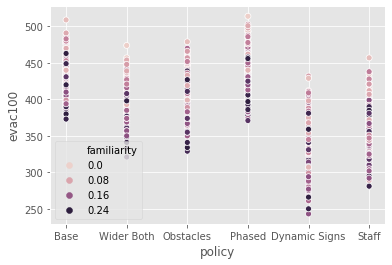

In [23]:
sns.scatterplot(x="policy", y="evac100", hue="familiarity", data=df)

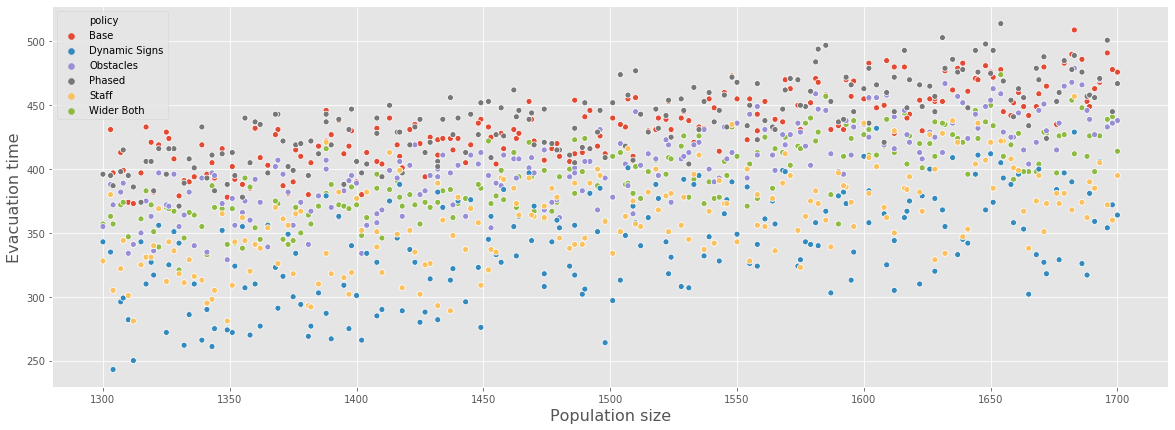

In [24]:
fig = plt.figure(figsize=(20,7))

sns.scatterplot(data=df, x="population", y="evac100", hue="policy")
plt.xlabel('Population size', fontsize=16)
plt.ylabel('Evacuation time', fontsize=16)
fig.savefig('casestudy-population.jpg')

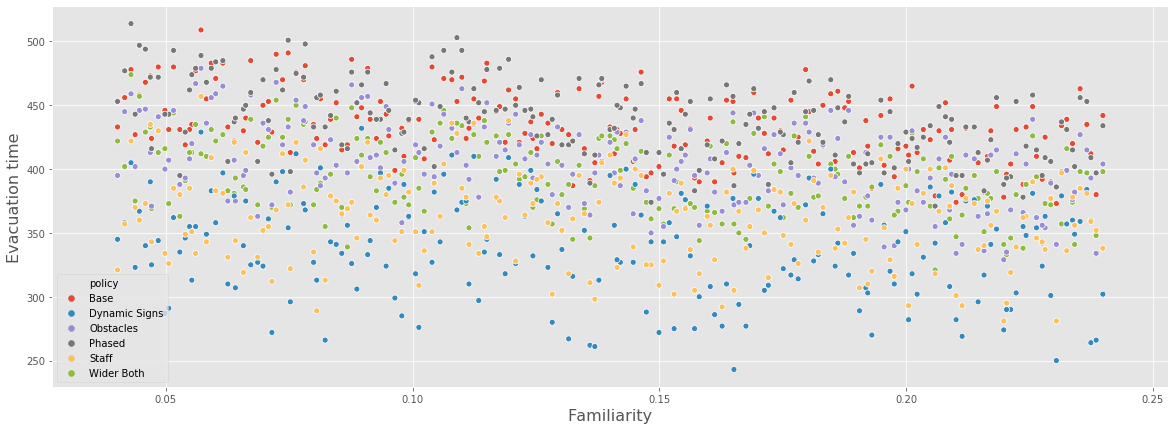

In [25]:
fig = plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x="familiarity", y="evac100", hue="policy")

plt.xlabel('Familiarity', fontsize=16)
plt.ylabel('Evacuation time', fontsize=16)
fig.savefig('casestudy-familiarity.jpg')

In [26]:
results = utilities.load_results('results/CaseStudy200scenariosActualValues.csv')
experiments, outcomes = results

outcomes_splitted = {'evac100': [], 'evac95': [], 'evac75': [], 'evac50': [], 'mean_delay': [], 'min_delay': [], 'max_delay': [], 'mean_density': [], 'mean_walkspeed': [], 'exit1': [], 'exit2': [], 'exit3': [], 'exit4': [], 'exit5': []}

for outcome in outcomes["evactimes"]:
    outcomes_splitted['evac100'].append(outcome[0][0])
    outcomes_splitted['evac95'].append(outcome[0][1])
    outcomes_splitted['evac75'].append(outcome[0][2])
    outcomes_splitted['evac50'].append(outcome[0][3])
    
for outcome in outcomes["densities"]:
    outcomes_splitted['mean_delay'].append(outcome[0][0])
    outcomes_splitted['min_delay'].append(outcome[0][1])
    outcomes_splitted['max_delay'].append(outcome[0][2])
    outcomes_splitted['mean_density'].append(outcome[0][3])
    outcomes_splitted['mean_walkspeed'].append(outcome[0][4])
    
for outcome in outcomes["evacuees_per_exit"]:
    outcomes_splitted['exit1'].append(outcome[0][0])
    outcomes_splitted['exit2'].append(outcome[0][1])
    outcomes_splitted['exit3'].append(outcome[0][2])
    outcomes_splitted['exit4'].append(outcome[0][3])
    outcomes_splitted['exit5'].append(outcome[0][4])
    
df_outcomes = pd.DataFrame(outcomes_splitted)
df = pd.concat([experiments,df_outcomes],axis=1,sort=False)

# Using DataFrame.drop
df.drop(df.columns[3:10], axis=1, inplace=True)

In [27]:
table = pd.DataFrame()

table = table.append(df.groupby(['policy']).mean()["evac100"])
table = table.append(df.groupby(['policy']).min()["evac100"])
table = table.append(df.groupby(['policy']).max()["evac100"])
table = table.append(df.groupby(['policy']).std()["evac100"])

table = table.round(0).astype('int32').T
table.columns = ["Mean", "Min", "Max", "STD"]

In [30]:
table

,Mean,Min,Max,STD
Base,306,248,385,31
Dynamic Signs,333,267,400,31
Obstacles,305,239,385,34
Phased,312,251,387,30
Staff,325,257,402,32
Wider Both,248,207,298,20


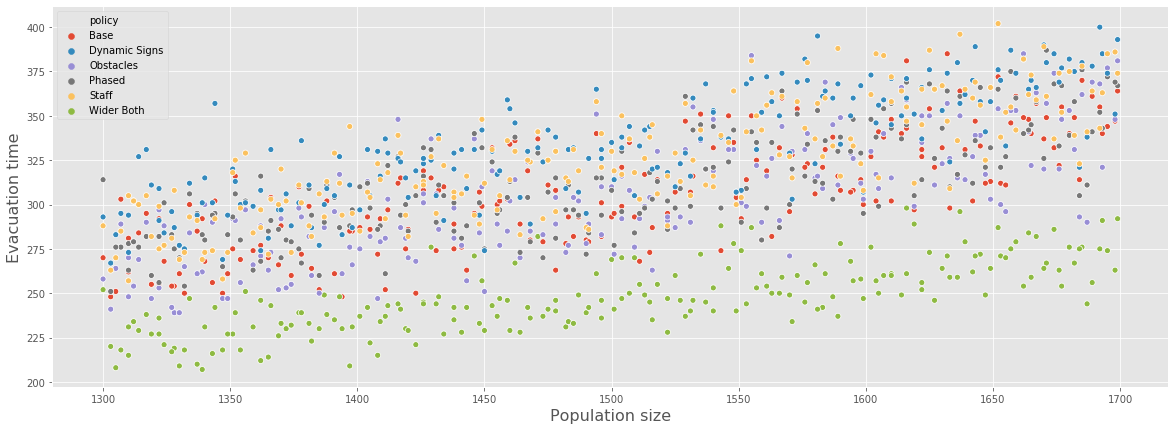

In [28]:
fig = plt.figure(figsize=(20,7))

sns.scatterplot(data=df, x="population", y="evac100", hue="policy")
plt.xlabel('Population size', fontsize=16)
plt.ylabel('Evacuation time', fontsize=16)
fig.savefig('casestudy-assumption-population.jpg')

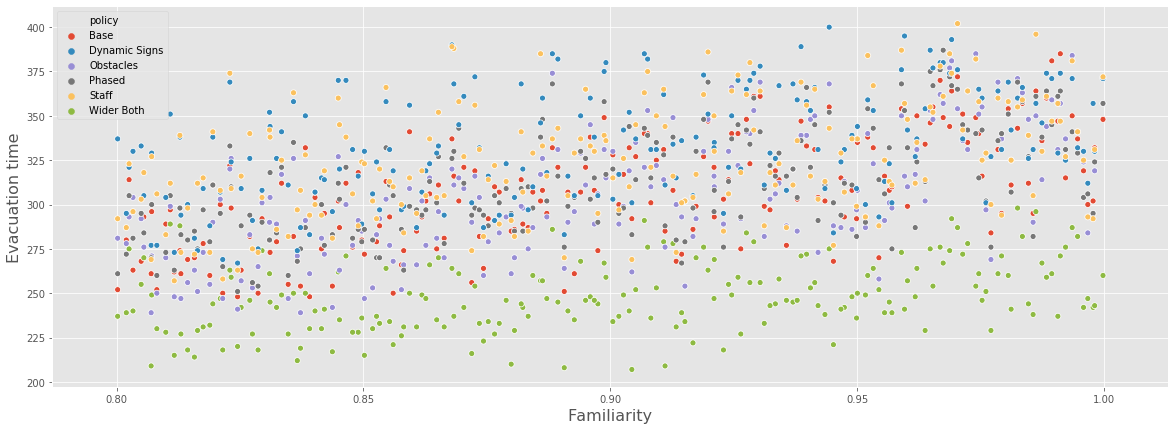

In [29]:
fig = plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x="familiarity", y="evac100", hue="policy")

plt.xlabel('Familiarity', fontsize=16)
plt.ylabel('Evacuation time', fontsize=16)
fig.savefig('casestudy-assumption-familiarity.jpg')